## Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

file_path = "data.csv"

# 读取CSV文件
df = pd.read_csv(file_path)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1879 non-null   int64  
 1   Age                            1879 non-null   int64  
 2   Gender                         1879 non-null   int64  
 3   Ethnicity                      1879 non-null   int64  
 4   SocioeconomicStatus            1879 non-null   int64  
 5   EducationLevel                 1879 non-null   int64  
 6   BMI                            1879 non-null   float64
 7   Smoking                        1879 non-null   int64  
 8   AlcoholConsumption             1879 non-null   float64
 9   PhysicalActivity               1879 non-null   float64
 10  DietQuality                    1879 non-null   float64
 11  SleepQuality                   1879 non-null   float64
 12  FamilyHistoryDiabetes          1879 non-null   i

In [3]:
pd.set_option('display.width', 500)

df.head(10)

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1,Confidential
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1,Confidential
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0,Confidential
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0,Confidential
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0,Confidential
5,6005,65,0,0,0,0,15.820815,1,17.781024,9.252522,...,0,86.378969,0,0,0,1.535161,9.682226,2.744281,0,Confidential
6,6006,61,1,2,1,3,20.075147,0,1.086479,8.745650,...,0,86.036931,0,0,0,0.578208,1.175504,1.229453,0,Confidential
7,6007,74,1,3,0,3,29.438938,0,6.187378,9.114535,...,0,47.315820,0,0,0,1.659424,2.258377,9.035877,0,Confidential
8,6008,54,0,0,1,2,15.027557,0,19.505734,0.590771,...,0,88.638130,0,0,0,3.675916,2.006186,3.452805,1,Confidential
9,6009,82,1,0,1,1,34.300044,1,15.943844,6.056621,...,0,96.636541,0,0,0,2.567315,4.031643,2.633287,0,Confidential


In [4]:
df.describe()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,SlowHealingSores,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,...,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,6939.000000,55.043108,0.487493,0.755721,0.992017,1.699308,27.687601,0.281533,10.096587,5.200790,...,0.102714,0.111229,48.508643,0.052155,0.103246,0.200639,1.997101,4.957539,5.011736,0.400213
std,542.564896,20.515839,0.499977,1.047558,0.764940,0.885665,7.190975,0.449866,5.914216,2.857012,...,0.303666,0.314500,28.758488,0.222400,0.304361,0.400585,1.122632,2.910934,2.920908,0.490072
min,6000.000000,20.000000,0.000000,0.000000,0.000000,0.000000,15.025898,0.000000,0.000928,0.004089,...,0.000000,0.000000,0.002390,0.000000,0.000000,0.000000,0.004013,0.005384,0.000362,0.000000
25%,6469.500000,38.000000,0.000000,0.000000,0.000000,1.000000,21.469981,0.000000,4.789725,2.751022,...,0.000000,0.000000,23.974098,0.000000,0.000000,0.000000,1.057801,2.420024,2.410113,0.000000
50%,6939.000000,55.000000,0.000000,0.000000,1.000000,2.000000,27.722988,0.000000,10.173865,5.249002,...,0.000000,0.000000,47.519693,0.000000,0.000000,0.000000,1.987170,4.843886,5.035208,0.000000
75%,7408.500000,73.000000,1.000000,1.000000,2.000000,2.000000,33.856460,1.000000,15.285359,7.671402,...,0.000000,0.000000,72.883179,0.000000,0.000000,0.000000,2.946019,7.513933,7.586865,1.000000
max,7878.000000,90.000000,1.000000,3.000000,2.000000,3.000000,39.998811,1.000000,19.996231,9.993893,...,1.000000,1.000000,99.788530,1.000000,1.000000,1.000000,3.999715,9.997165,9.993029,1.000000


In [5]:
df.duplicated().sum()

0

In [6]:
print("\n数据集列名:\n", df.columns)
missing_values = df.isnull().sum()
print("\n缺失值统计:\n", missing_values[missing_values > 0])


数据集列名:
 Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryDiabetes', 'GestationalDiabetes', 'PolycysticOvarySyndrome', 'PreviousPreDiabetes', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
       'AntihypertensiveMedications', 'Statins', 'AntidiabeticMedications', 'FrequentUrination', 'ExcessiveThirst', 'UnexplainedWeightLoss', 'FatigueLevels', 'BlurredVision', 'SlowHealingSores', 'TinglingHandsFeet', 'QualityOfLifeScore', 'HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality', 'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

缺失值统计:
 Series([], dtype: int64)


In [7]:
df.describe()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,SlowHealingSores,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,...,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,6939.000000,55.043108,0.487493,0.755721,0.992017,1.699308,27.687601,0.281533,10.096587,5.200790,...,0.102714,0.111229,48.508643,0.052155,0.103246,0.200639,1.997101,4.957539,5.011736,0.400213
std,542.564896,20.515839,0.499977,1.047558,0.764940,0.885665,7.190975,0.449866,5.914216,2.857012,...,0.303666,0.314500,28.758488,0.222400,0.304361,0.400585,1.122632,2.910934,2.920908,0.490072
min,6000.000000,20.000000,0.000000,0.000000,0.000000,0.000000,15.025898,0.000000,0.000928,0.004089,...,0.000000,0.000000,0.002390,0.000000,0.000000,0.000000,0.004013,0.005384,0.000362,0.000000
25%,6469.500000,38.000000,0.000000,0.000000,0.000000,1.000000,21.469981,0.000000,4.789725,2.751022,...,0.000000,0.000000,23.974098,0.000000,0.000000,0.000000,1.057801,2.420024,2.410113,0.000000
50%,6939.000000,55.000000,0.000000,0.000000,1.000000,2.000000,27.722988,0.000000,10.173865,5.249002,...,0.000000,0.000000,47.519693,0.000000,0.000000,0.000000,1.987170,4.843886,5.035208,0.000000
75%,7408.500000,73.000000,1.000000,1.000000,2.000000,2.000000,33.856460,1.000000,15.285359,7.671402,...,0.000000,0.000000,72.883179,0.000000,0.000000,0.000000,2.946019,7.513933,7.586865,1.000000
max,7878.000000,90.000000,1.000000,3.000000,2.000000,3.000000,39.998811,1.000000,19.996231,9.993893,...,1.000000,1.000000,99.788530,1.000000,1.000000,1.000000,3.999715,9.997165,9.993029,1.000000


In [8]:
# 检查正负样本均衡性
def check_column_values(df, column_name):
    """检查DataFrame中指定列的值种类和数量"""
    print(f"列 '{column_name}' 的值统计:")
    value_counts = df[column_name].value_counts(dropna=False)
    
    print("\n值种类和数量:")
    print(value_counts)
    
    print(f"\n不同值的总数: {len(value_counts)}")
    print(f"总样本数: {len(df)}")
    
    # 如果是二分类问题，可以显示正负样本比例
    if set(df[column_name].dropna().unique()).issubset({0, 1}):
        pos_count = (df[column_name] == 1).sum()
        neg_count = (df[column_name] == 0).sum()
        na_count = df[column_name].isna().sum()
        
        print("\n二分类标签统计:")
        print(f"正样本(1)数量: {pos_count} ({pos_count/len(df):.2%})")
        print(f"负样本(0)数量: {neg_count} ({neg_count/len(df):.2%})")
        if na_count > 0:
            print(f"缺失值数量: {na_count} ({na_count/len(df):.2%})")
        
        print(f"正负样本比例: {pos_count/neg_count if neg_count > 0 else 'inf':.2f}")

# 使用示例
check_column_values(df, 'Diagnosis')

列 'Diagnosis' 的值统计:

值种类和数量:
Diagnosis
0    1127
1     752
Name: count, dtype: int64

不同值的总数: 2
总样本数: 1879

二分类标签统计:
正样本(1)数量: 752 (40.02%)
负样本(0)数量: 1127 (59.98%)
正负样本比例: 0.67


In [9]:
new_df = df[['Age', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'Statins', 'FrequentUrination', 'ExcessiveThirst', 'UnexplainedWeightLoss', 'FatigueLevels', 'BlurredVision', 'QualityOfLifeScore', 'MedicalCheckupsFrequency',
       'MedicationAdherence', 'HealthLiteracy','Diagnosis']]

new_df.head(10)

new_df.to_csv("p1_before_scaling.csv", index=False)

# View Variable

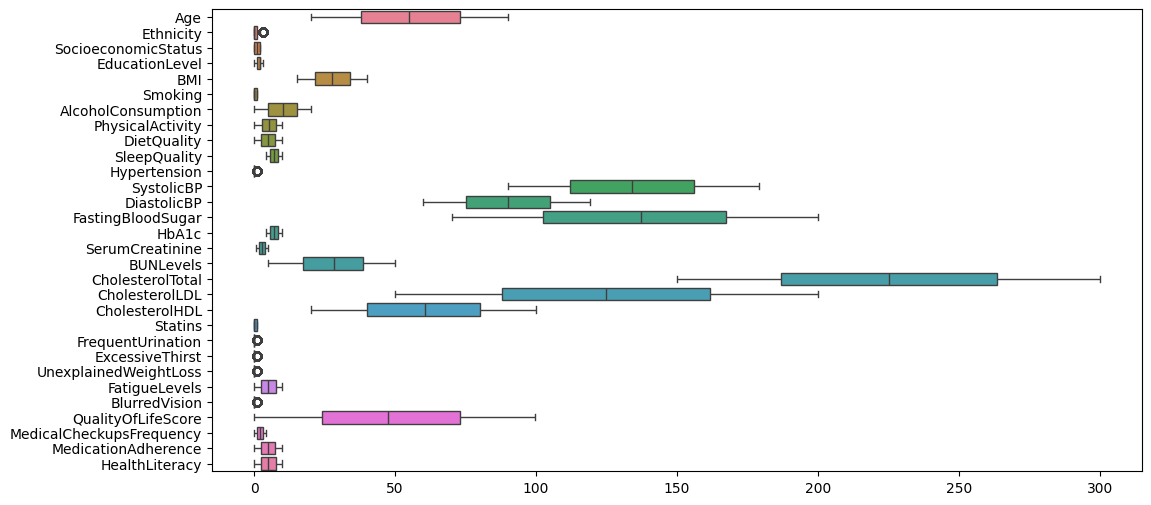

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel',
                    'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity',
                    'DietQuality', 'SleepQuality', 'Hypertension', 'SystolicBP',
                    'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine',
                    'BUNLevels', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
                    'Statins', 'FrequentUrination', 'ExcessiveThirst', 'UnexplainedWeightLoss',
                    'FatigueLevels', 'BlurredVision', 'QualityOfLifeScore',
                    'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy']], orient="h")
plt.show()

ValueError: num must be an integer with 1 <= num <= 8, not 9

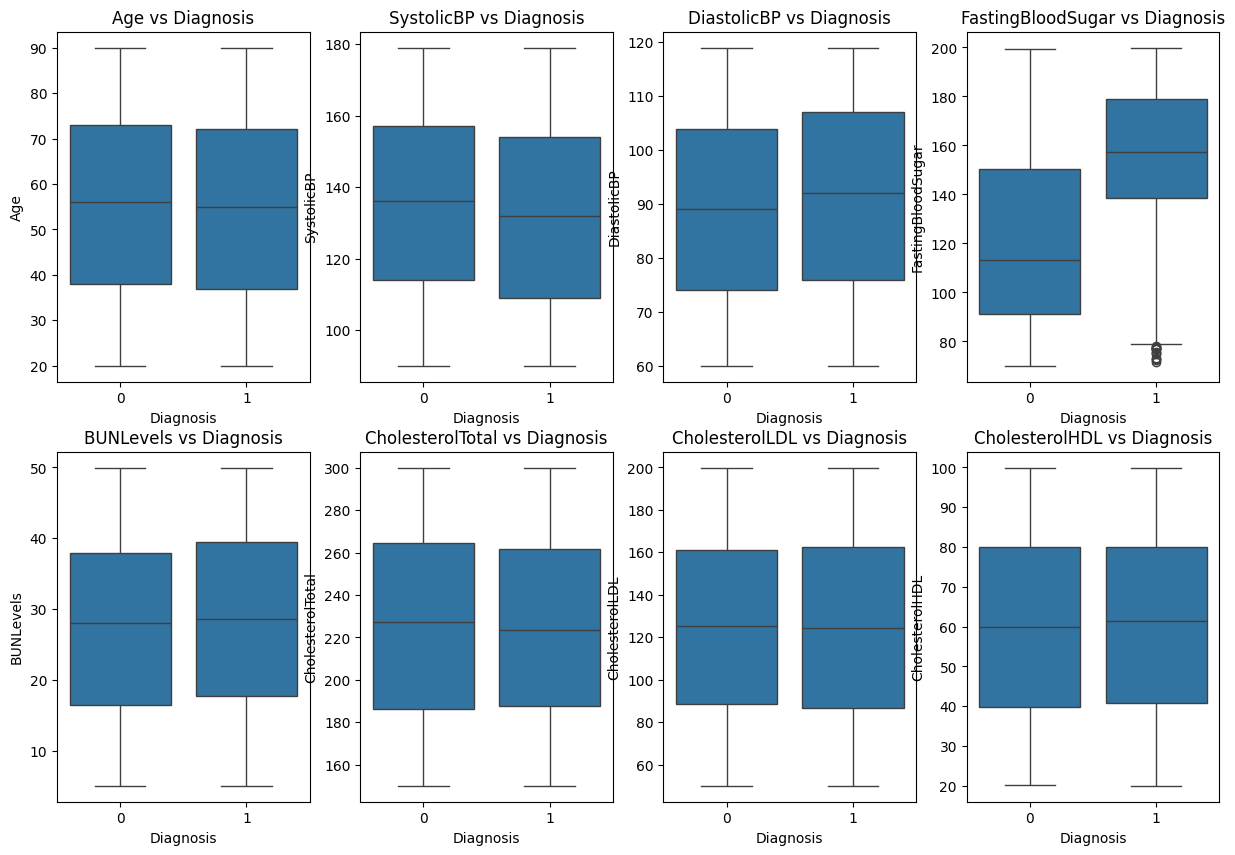

In [ ]:
# 选择需要绘制箱线图的特征
features_to_plot = ['Age', 'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'BUNLevels', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'QualityOfLifeScore']

# 设置画布大小
plt.figure(figsize=(15, 10))

# 绘制箱线图（使用填充后的值，标准化之前）
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 4, i)  # 2行4列的子图布局
    sns.boxplot(x='Diagnosis', y=feature, data=df)
    plt.title(f'{feature} vs Diagnosis')
    plt.xlabel('Diagnosis')
    plt.ylabel(feature)

# 调整布局
plt.tight_layout()
plt.show()

Categorical Columns to Remove: ['Ethnicity', 'SocioeconomicStatus', 'EducationLevel', 'Smoking', 'Hypertension', 'Statins', 'FrequentUrination', 'ExcessiveThirst', 'UnexplainedWeightLoss', 'BlurredVision', 'Diagnosis']


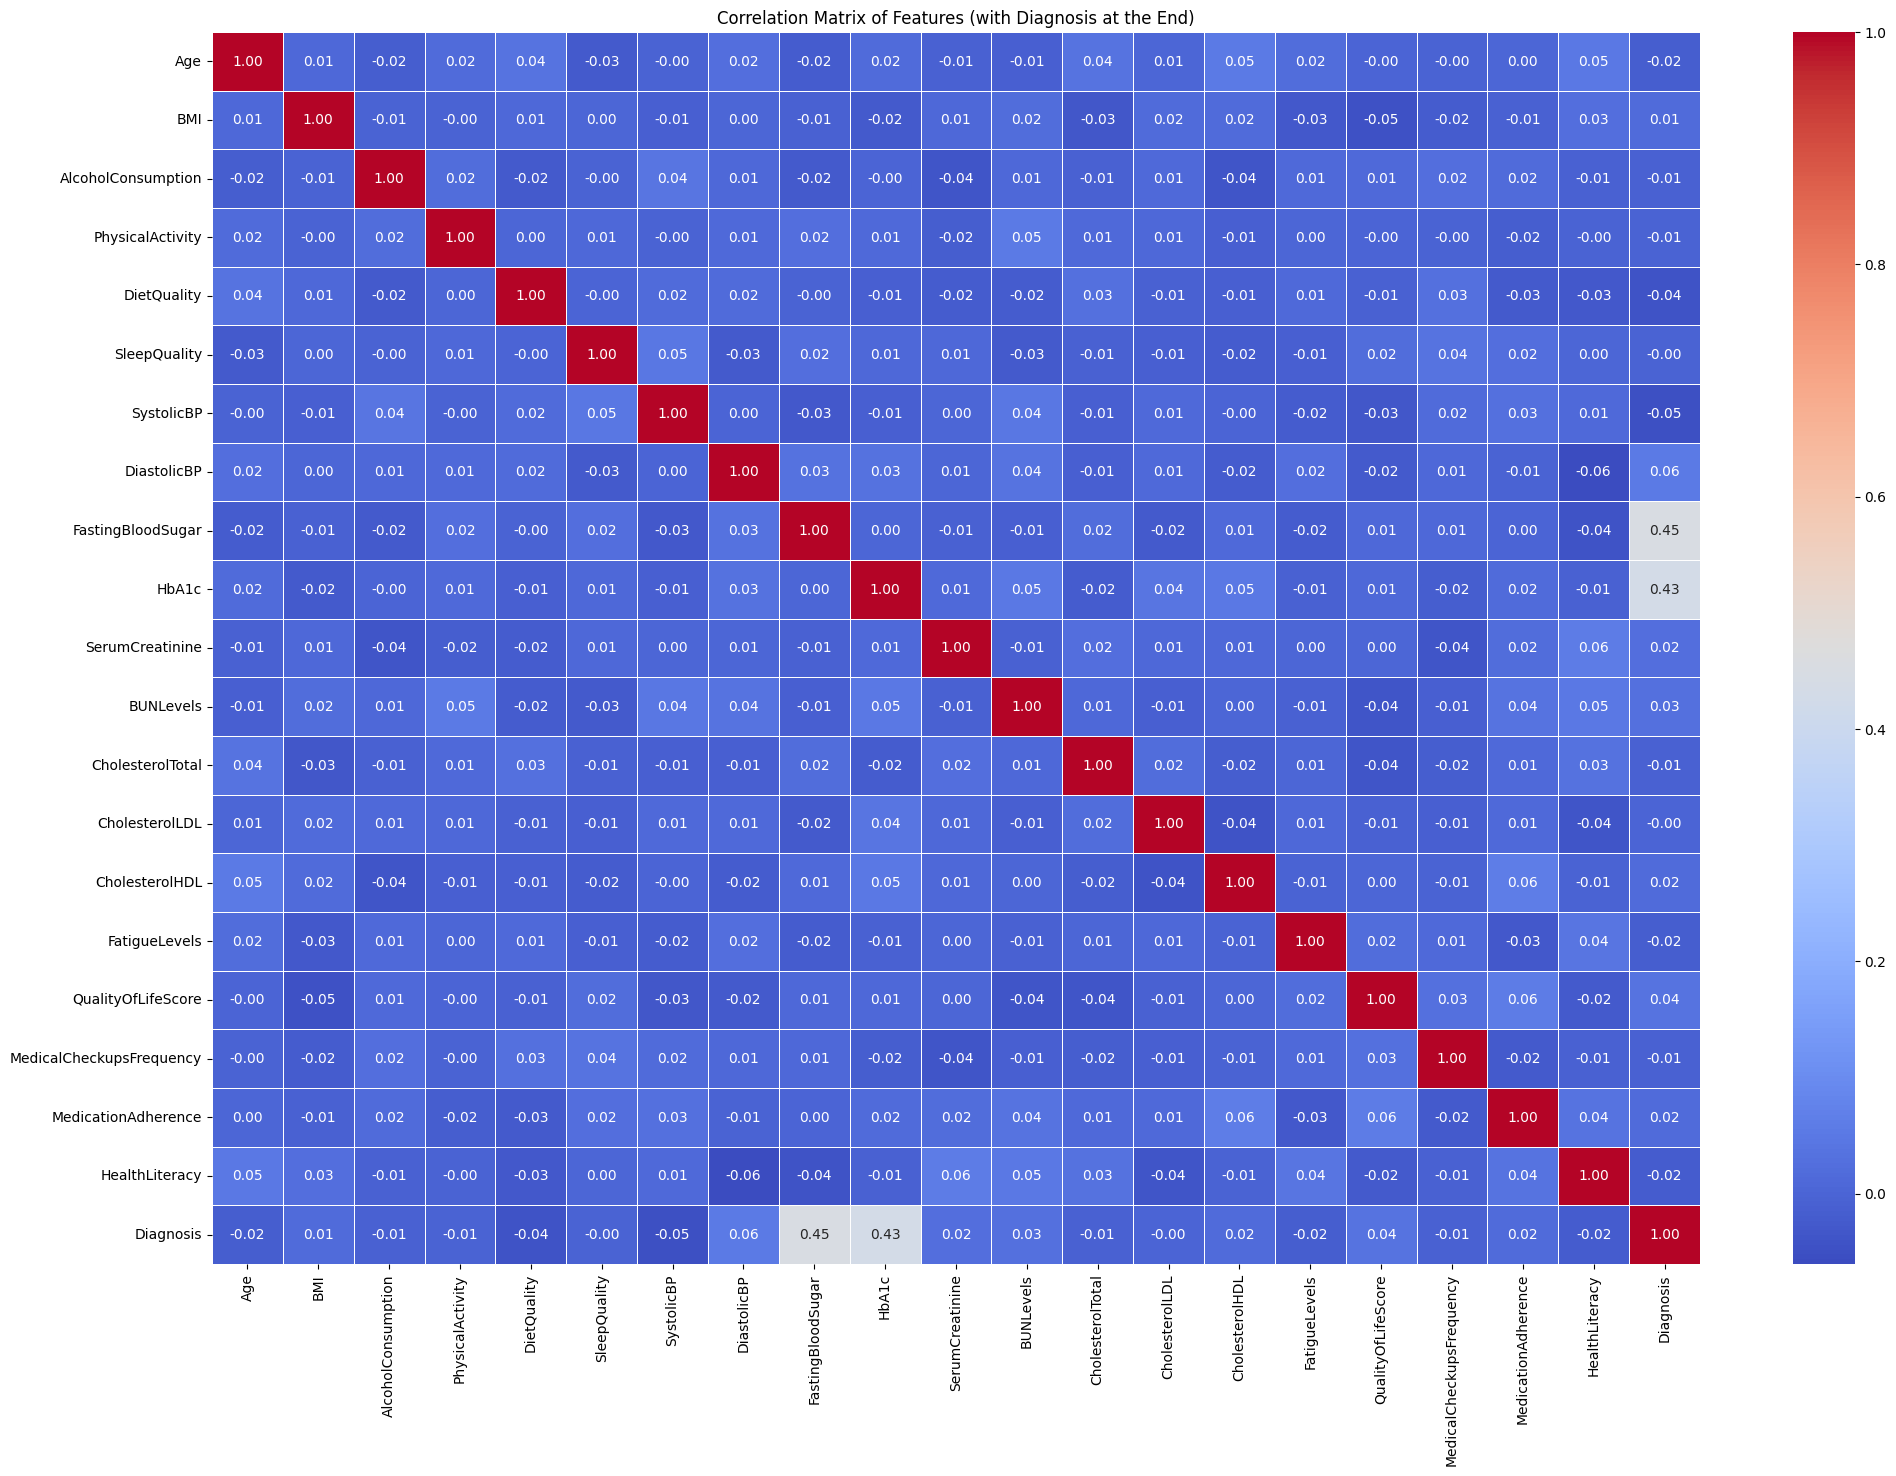

Correlation Matrix:
                               Age       BMI  AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  SystolicBP  DiastolicBP  FastingBloodSugar     HbA1c  ...  BUNLevels  CholesterolTotal  CholesterolLDL  CholesterolHDL  FatigueLevels  QualityOfLifeScore  MedicalCheckupsFrequency  MedicationAdherence  HealthLiteracy  Diagnosis
Age                       1.000000  0.006928           -0.017781          0.017811     0.036613     -0.025745   -0.003944     0.022890          -0.022774  0.016533  ...  -0.011914          0.036122        0.005428        0.052419       0.018845           -0.001543                 -0.003905             0.001905        0.047514  -0.016864
BMI                       0.006928  1.000000           -0.006644         -0.003442     0.006032      0.002152   -0.012732     0.002679          -0.007692 -0.024380  ...   0.021573         -0.032015        0.016210        0.017991      -0.030339           -0.046976                 -0.021301            

In [ ]:
# 2. 识别分类变量并删除
categorical_columns = []
unique_values = df.nunique()

for col in df.columns:
    # 判断条件：如果是字符串类型，或是数值型但唯一值较少
    if df[col].dtype == "object" or (df[col].dtype in ["int64", "float64"] and unique_values[col] <= 10):
        categorical_columns.append(col)

print("Categorical Columns to Remove:", categorical_columns)

# 删除分类变量，仅保留连续型变量
numeric_data = df.drop(columns=categorical_columns)

# 检查是否包含 'Diagnosis' 列
if "Diagnosis" in df.columns:
    # 将 'Diagnosis' 列从原始数据中提取出来
    diagnosis_column = df["Diagnosis"]
    # 将 'Diagnosis' 添加到 numeric_data 的最后一列
    numeric_data = pd.concat([numeric_data, diagnosis_column], axis=1)

# 3. 计算相关性矩阵
correlation_matrix = numeric_data.corr()

# 4. 使用热力图展示相关性矩阵
plt.figure(figsize=(24, 16))
sns.heatmap(
    correlation_matrix,
    annot=True,          # 显示相关系数
    cmap="coolwarm",     # 使用冷暖色系
    fmt=".2f",           # 格式化为两位小数
    linewidths=0.5       # 单元格之间的线宽
)
plt.title("Correlation Matrix of Features (with Diagnosis at the End)")
plt.show()

# 5. 打印相关性矩阵
print("Correlation Matrix:")
print(correlation_matrix)

# 创建掩码，隐藏相关性小于 0.5 的部分
mask = (correlation_matrix.abs() < 0.5)

import plotly.express as px

# 绘制交互式热力图
fig = px.imshow(
    correlation_matrix,
    color_continuous_scale="Viridis",  # 渐变色
    title="Interactive Heatmap with Correlation Coefficients",
    labels=dict(color="Correlation"),  # 设置颜色条标签
    aspect="auto",                     # 自动调整宽高比
    text_auto=".2f"                    # 显示相关系数，格式化为两位小数
)
fig.show()

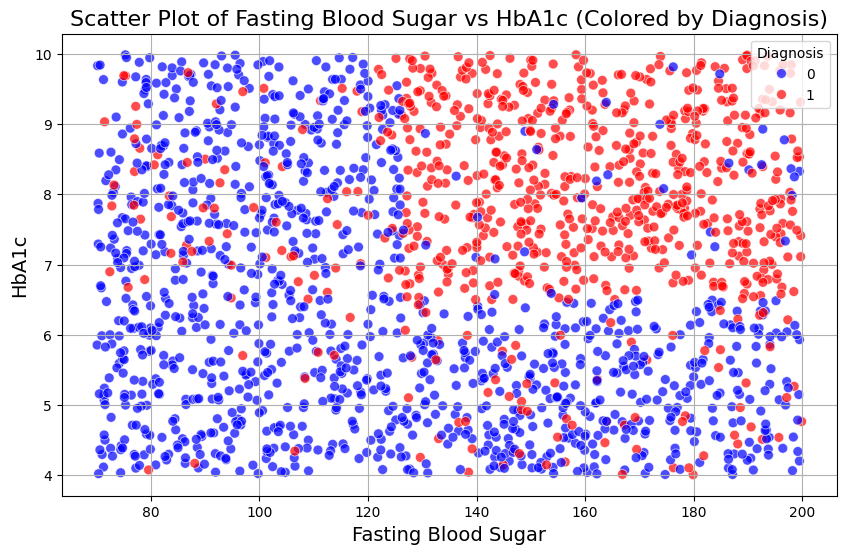

In [ ]:
# 3. 绘制散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="FastingBloodSugar",
    y="HbA1c",
    hue="Diagnosis",          # 根据 Diagnosis 值设置颜色
    palette=["blue", "red"],  # 0 -> 蓝色，1 -> 红色
    s=50,                    # 设置点的大小
    alpha=0.7                 # 设置透明度
)

# 4. 添加图表标题和标签
plt.title("Scatter Plot of Fasting Blood Sugar vs HbA1c (Colored by Diagnosis)", fontsize=16)
plt.xlabel("Fasting Blood Sugar", fontsize=14)
plt.ylabel("HbA1c", fontsize=14)
plt.grid(True)  # 显示网格线

# 5. 显示图表
plt.show()

      FastingBloodSugar            FastingBloodSugarGroup
0            163.687162         High glucose (≥126 mg/dL)
1            188.347070         High glucose (≥126 mg/dL)
2            127.703653         High glucose (≥126 mg/dL)
3             82.688415     Normal glucose (70-100 mg/dL)
4             90.743395     Normal glucose (70-100 mg/dL)
...                 ...                               ...
1874         109.832032  Elevated glucose (100-125 mg/dL)
1875          90.729361     Normal glucose (70-100 mg/dL)
1876         149.366801         High glucose (≥126 mg/dL)
1877         162.027044         High glucose (≥126 mg/dL)
1878         175.011749         High glucose (≥126 mg/dL)

[1879 rows x 2 columns]


<ipython-input-21-20741b9697f3>:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



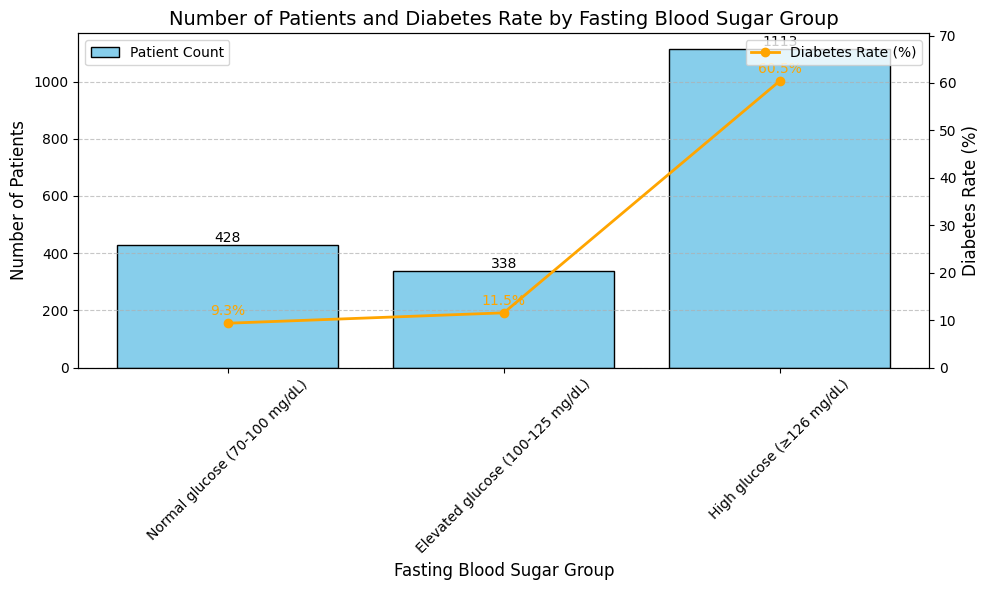

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by FastingBloodSugar
bins = [70, 100, 125, 200] # 年龄分组区间
labels = ['Normal glucose (70-100 mg/dL)', 'Elevated glucose (100-125 mg/dL)', 'High glucose (≥126 mg/dL)']
df['FastingBloodSugarGroup'] = pd.cut(df['FastingBloodSugar'], bins=bins, labels=labels)

print(df[['FastingBloodSugar', 'FastingBloodSugarGroup']])

# 计算每组的数量
age_group_counts = df['FastingBloodSugarGroup'].value_counts().sort_index()

# 计算每组的糖尿病患病率（假设 Diagnosis 列为 1 表示患有糖尿病）
age_diabetes_rate = df.groupby('FastingBloodSugarGroup')['Diagnosis'].mean() * 100 # 转换为百分比

# 绘制柱状图和折线图
fig, ax1 = plt.subplots(figsize=(10, 6))

# 柱状图：每组数量
bars = ax1.bar(age_group_counts.index, age_group_counts.values, color='skyblue', edgecolor='black', label='Patient Count')

# 在柱状图上方显示数量
for bar in bars:
  height = bar.get_height()
  ax1.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}', ha='center', va='bottom', fontsize=10)

# 设置柱状图的标题和标签
ax1.set_title('Number of Patients and Diabetes Rate by Fasting Blood Sugar Group', fontsize=14)
ax1.set_xlabel('Fasting Blood Sugar Group', fontsize=12)
ax1.set_ylabel('Number of Patients', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# 折线图：糖尿病患病率
ax2 = ax1.twinx() # 创建第二个 y 轴
ax2.plot(age_diabetes_rate.index, age_diabetes_rate.values, marker='o', color='orange', linestyle='-', linewidth=2, label='Diabetes Rate (%)')

# 在折线图的每个点旁边显示数值
for i, rate in enumerate(age_diabetes_rate):
  ax2.text(i, rate + 1, f'{rate:.1f}%', ha='center', va='bottom', fontsize=10, color='orange')

# 设置折线图的标题和标签
ax2.set_ylabel('Diabetes Rate (%)', fontsize=12)
ax2.set_ylim(0, max(age_diabetes_rate) + 10) # 调整 y 轴范围以便显示数值

# 添加图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 调整布局以避免重叠
plt.tight_layout()

# 显示图表
plt.show()

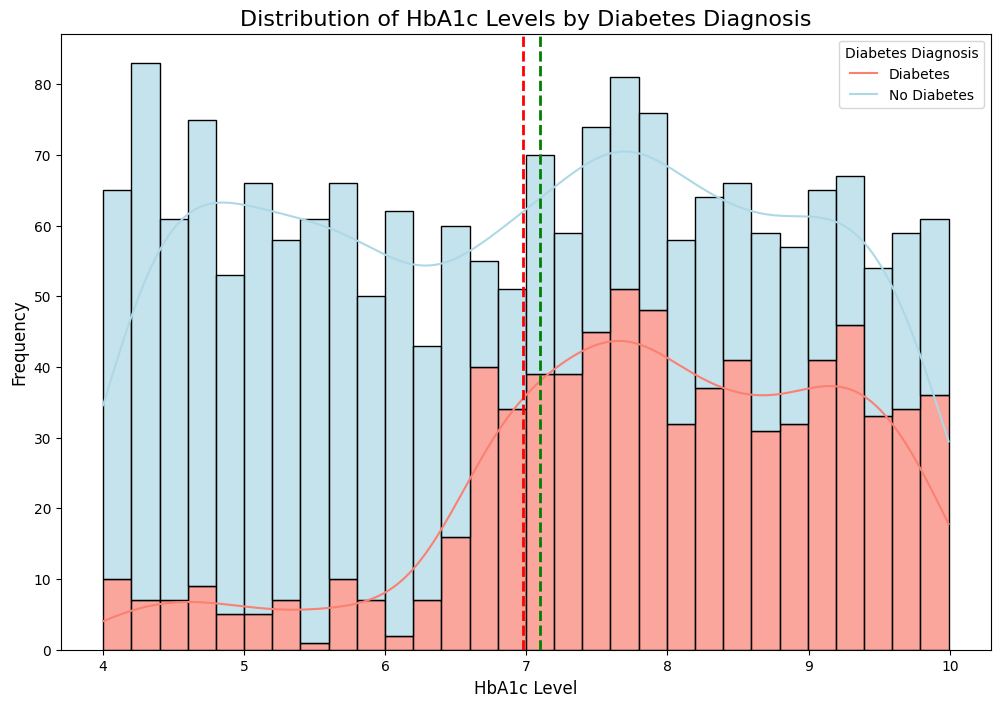

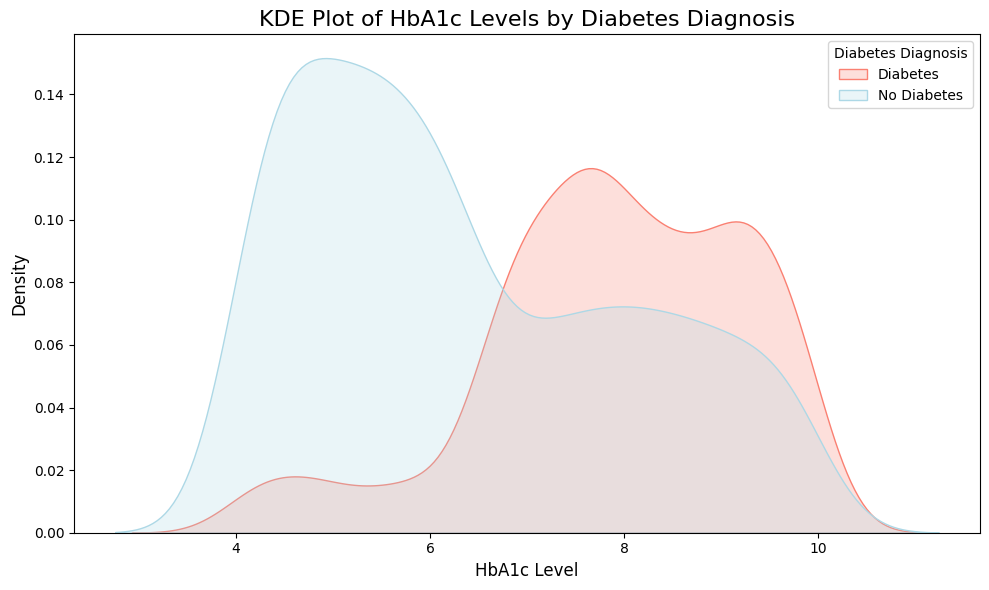

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制 HbA1c 数据分布图，按糖尿病诊断结果分组
plt.figure(figsize=(12, 8))

# 使用 Seaborn 的 histplot 绘制分组直方图
sns.histplot(
    data=df,
    x='HbA1c',
    hue='Diagnosis',  # 按糖尿病诊断结果分组
    multiple='stack',  # 直方图堆叠显示
    bins=30,  # 分箱数量
    palette=['lightblue', 'salmon'],  # 不同颜色区分健康和患病组
    edgecolor='black',  # 直方图边缘颜色
    alpha=0.7,  # 透明度
    kde=True  # 添加核密度估计曲线
)

# 添加标题和标签
plt.title('Distribution of HbA1c Levels by Diabetes Diagnosis', fontsize=16)
plt.xlabel('HbA1c Level', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 图例说明
plt.legend(title='Diabetes Diagnosis', labels=['Diabetes', 'No Diabetes'])

# 扩展功能 1：在图中标记均值和中位数
mean_hba1c = df['HbA1c'].mean()
median_hba1c = df['HbA1c'].median()

plt.axvline(mean_hba1c, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_hba1c:.2f}')
plt.axvline(median_hba1c, color='green', linestyle='--', linewidth=2, label=f'Median: {median_hba1c:.2f}')

# 扩展功能 2：条件密度估计曲线
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='HbA1c', hue='Diagnosis', fill=True, palette=['lightblue', 'salmon'])
plt.title('KDE Plot of HbA1c Levels by Diabetes Diagnosis', fontsize=16)
plt.xlabel('HbA1c Level', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Diabetes Diagnosis', labels=['Diabetes', 'No Diabetes'])

# 显示图表
plt.tight_layout()
plt.show()

1. 数据分布特点

分组分布

未患糖尿病 (Diagnosis=0) ：

主要集中在 4.0 ~ 6.6 范围内。
频率最高的区间为 [4.21, 4.41) 和 [5.80, 6.60)。

在 HbA1c > 7.0 的范围内，频率显著下降。

患糖尿病 (Diagnosis=1) ：

主要集中在 6.4 ~ 10.0 范围内。
频率最高的区间为 [6.60, 8.00) 和 [9.00, 9.40)。

在 HbA1c < 6.6 的范围内，频率较低。

2.关键节点分析

(1) HbA1c 的阈值范围

健康人群的典型范围 ：

对于未患糖尿病的人群，HbA1c 的主要分布范围是 [4.0, 6.6]，尤其是 [4.21, 6.20) 区间内的频率最高。
这表明健康人群的 HbA1c 水平通常较低。

糖尿病患者的典型范围 ：

对于患糖尿病的人群，HbA1c 的主要分布范围是 [6.6, 10.0]，尤其是 [6.60, 8.00) 区间内的频率最高。
这表明糖尿病患者的 HbA1c 水平通常较高。

(2) 临界点

HbA1c = 6.6 是一个关键分界点 ：

在 HbA1c < 6.0 的范围内，未患糖尿病的人群占绝大多数。
在 HbA1c ≥ 6.0 的范围内，患糖尿病的人群比例显著增加。

HbA1c = 7.0 是另一个重要分界点 ：

根据医学标准，HbA1c ≥ 6.5 通常被认为是糖尿病的诊断阈值。
在 HbA1c ≥ 7.0 的范围内，患糖尿病的人群频率显著高于未患糖尿病的人群。

(3) 高风险区间

HbA1c ≥ 7.6 是高风险区间 ：

在 [7.60, 7.80) 和 [7.80, 8.00) 区间内，患糖尿病的人群频率达到峰值。
这表明 HbA1c 较高的个体患糖尿病的风险显著增加。

3. 结论与意义

(1) HbA1c 与糖尿病的关系

HbA1c 是反映血糖控制水平的重要指标，其值越高，患糖尿病的可能性越大。

从直方图数据可以看出，未患糖尿病的人群的 HbA1c 值主要集中在 [4.0, 6.0]，而患糖尿病的人群的 HbA1c 值主要集中在 [6.0, 9.0]。

(2) 关键阈值

HbA1c = 6.0 ：
可以作为初步筛查糖尿病的参考值。低于此值的个体患糖尿病的可能性较低。

HbA1c = 6.5 ：
根据医学标准，可以作为糖尿病诊断的阈值。超过此值的个体需要进一步检查。

HbA1c = 7.0 ：
是区分高风险人群的关键点。在此值以上的个体患糖尿病的风险显著增加。

(3) 实际应用

健康人群监测 ：
如果个体的 HbA1c 值接近或超过 6.0，应引起注意，并定期监测血糖水平。

糖尿病患者管理 ：
对于 HbA1c ≥ 7.0 的患者，应加强血糖控制，避免并发症的发生。

4. 图表中的关键发现

(1) 数据分布差异

未患糖尿病的人群的 HbA1c 分布较为集中，且偏向低值。
患糖尿病的人群的 HbA1c 分布较为分散，且偏向高值。

(2) 频率峰值

未患糖尿病的人群的频率峰值出现在 [4.21, 4.41) 和 [5.80, 6.60)。
患糖尿病的人群的频率峰值出现在 [7.60, 7.80) 和 [7.80, 8.00)。
                                
(3) 高风险区域
在 [7.60, 8.00) 区间内，患糖尿病的人群频率显著高于未患糖尿病的人群，表明这是高风险区域。

逻辑回归分析：
1. 相关性矩阵分析

糖尿病诊断 (Diagnosis) 与其他特征的相关性（删去了以他次要相关性（因为相关系数太低了））

强相关性 ：

FastingBloodSugar（空腹血糖）与 Diagnosis 的相关系数为 0.451990 ，表明空腹血糖水平是糖尿病诊断的重要指标。

HbA1c（糖化血红蛋白）与 Diagnosis 的相关系数为 0.431109 ，进一步证实了其在糖尿病诊断中的重要性。

这两个指标均直接反映血糖水平，是糖尿病的核心诊断依据。

2. 逻辑回归特征重要性分析

逻辑回归模型的特征重要性图显示了各个特征对糖尿病诊断的贡献程度。以下是一些关键点：

(1) 最重要的特征

FastingBloodSugar 和 HbA1c ：
这两个特征的系数值最高，分别为 1.88 和 1.78 ，表明它们是糖尿病诊断的最重要指标。
这与相关性矩阵中的结果一致，进一步验证了空腹血糖和糖化血红蛋白在糖尿病诊断中的核心地位。

(2) 次要重要特征

FrequentUrination（尿频） ：
系数为 0.68 ，表明尿频是糖尿病的重要症状之一。

Hypertension（高血压） ：
系数为 0.55 ，表明高血压是糖尿病的重要风险因素。

ExcessiveThirst（极度口渴） ：
系数为 0.48 ，表明这是糖尿病症状之一，对诊断有显著贡献。

UnexplainedWeightLoss（不明原因体重减轻） ：
系数为 0.31 ，表明这是糖尿病的典型症状之一。

BlurredVision（视力模糊） ：
系数为 0.26 ，表明这是糖尿病并发症的表现，对诊断有一定帮助。

(3) 较低重要性的特征（不重要）

生活方式与健康行为 ：
PhysicalActivity、DietQuality、SleepQuality 等特征的系数值较低，表明它们对糖尿病诊断的直接影响较小，但可能通过其他机制间接影响糖尿病风险。

社会经济与医疗行为 ：
SocioeconomicStatus、MedicationAdherence、HealthLiteracy 等特征的系数值较低，表明它们对糖尿病诊断的直接影响有限，但可能影响糖尿病的预防和管理。

(4) 生理指标（不重要）
血脂指标 ：
CholesterolTotal、CholesterolLDL、CholesterolHDL 等特征的系数值较低，表明它们对糖尿病诊断的直接影响较小。

其他生理指标 ：
BMI、Age、SerumCreatinine 等特征的系数值较低，表明它们对糖尿病诊断的直接影响有限。

(5) 负相关性特征：
DietQuality
系数值 ：-0.15
解释 ：
DietQuality 的系数为负值，表明饮食质量较高的个体患糖尿病的风险可能较低。这符合逻辑，因为健康的饮食习惯通常有助于控制血糖水平和降低糖尿病风险。
2. SystolicBP
系数值 ：-0.13。
解释 ：
SystolicBP（收缩压）的系数为负值，表明收缩压较低的个体患糖尿病的风险可能较低。虽然高血压是糖尿病的常见并发症，但过低的血压也可能与其他健康问题相关，从而间接影响糖尿病的诊断。

3. 综合分析

(1) 核心诊断指标（有这个内容即可）

空腹血糖 (FastingBloodSugar) 和糖化血红蛋白 (HbA1c) 是糖尿病诊断的核心指标，具有最高的相关性和最重要的特征权重。

高血压 (Hypertension) 和典型的糖尿病症状（如极度口渴、视力模糊、不明原因体重减轻等）也是诊断的重要依据。

(2) 风险因素

生活方式 ：尽管相关性较弱，但饮食质量 (DietQuality)、体育活动 (PhysicalActivity)、睡眠质量 (SleepQuality) 等生活方式因素可能通过长期影响血糖水平而间接增加糖尿病风险。

社会经济与医疗行为 ：社会经济状况 (SocioeconomicStatus)、药物依从性 (MedicationAdherence)、健康素养 (HealthLiteracy) 等因素可能影响糖尿病的预防和管理，但对诊断的直接影响较小。

(3) 生理指标

血脂指标（如总胆固醇、LDL、HDL）和 BMI 对糖尿病诊断的直接影响较小，但可能通过其他机制（如心血管疾病风险）间接影响糖尿病的发生和发展。

4. 结论

核心诊断依据 ：空腹血糖和糖化血红蛋白是糖尿病诊断的最关键指标。

&&次要诊断依据 ：高血压和典型的糖尿病症状（如极度口渴、视力模糊、不明原因体重减轻）对诊断也有重要贡献。

&&风险因素 ：生活方式（饮食、运动、睡眠）和社会经济状况可能间接影响糖尿病风险，但对诊断的直接影响较小。

未来研究方向 ：可以进一步探索生活方式和健康行为对糖尿病的长期影响，以及如何通过改善这些因素来降低糖尿病风险。

通过结合相关性矩阵和逻辑回归特征重要性分析，我们可以更全面地理解糖尿病诊断的关键因素及其相互关系。

重要特征分析：

(1) 最重要的特征

1.Hypertension（高血压） ：
系数值最高，为 1.459155 ，表明高血压是糖尿病诊断的最重要因素之一。

2.BlurredVision（视力模糊） ：
系数为 1.132332 ，表明视力模糊是糖尿病的重要症状之一。

3.FrequentUrination（频繁排尿） ：
系数为 1.084885 ，表明频繁排尿是糖尿病的典型症状。

4.UnexplainedWeightLoss（不明原因体重减轻） ：
系数为 1.042157 ，表明这是糖尿病的重要症状之一。

5.ExcessiveThirst（极度口渴） ：
系数为 1.022395 ，表明极度口渴是糖尿病的典型症状。

(2) 次要重要特征

HbA1c（糖化血红蛋白） ：
系数为 0.831683 ，表明糖化血红蛋白是糖尿病诊断的重要指标。

其他次重要特征的系数值过低。

(3) 较为重要的负向影响特征

Statins（他汀类药物使用情况） ：
系数为 -0.238234 ，表明使用他汀类药物可能降低糖尿病风险。

Ethnicity（种族） ：
系数为 -0.086006 ，表明某些种族可能具有较低的糖尿病风险。

# Normalization

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("p1_before_scaling.csv")

# 特征与目标变量
X = df.iloc[:, :-1]  # 特征列
y = df.iloc[:, -1]   # 目标列

# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 将标准化后的数据转换为DataFrame以保留列名
X_train_scaled_df = pd.DataFrame(X_train, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test, columns=X.columns)

# 添加目标变量列
train_df = X_train_scaled_df.copy()
train_df['target'] = y_train.values
test_df = X_test_scaled_df.copy()
test_df['target'] = y_test.values

# 保存合并后的完整标准化数据集
full_scaled_df = pd.concat([train_df, test_df], axis=0)
full_scaled_df.to_csv("p1_after_scaling.csv", index=False)
print("- 完整数据集: p1_after_scaling.csv")

import joblib
joblib.dump(scaler, 'standard_scaler.pkl')
print("- 标准化器: standard_scaler.pkl")

- 完整数据集: p1_after_scaling.csv
- 标准化器: standard_scaler.pkl


# Model Development

## Baseline Model

Cross-validation accuracy: 0.8290 ± 0.0201

Confusion Matrix:
[[205  28]
 [ 33 110]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       233
           1       0.80      0.77      0.78       143

    accuracy                           0.84       376
   macro avg       0.83      0.82      0.83       376
weighted avg       0.84      0.84      0.84       376


AUC: 0.9055

Feature Importance:
                     Feature  Coefficient
13         FastingBloodSugar     1.850567
14                     HbA1c     1.776292
21         FrequentUrination     0.646968
10              Hypertension     0.560111
22           ExcessiveThirst     0.485436
23     UnexplainedWeightLoss     0.292361
25             BlurredVision     0.237477
2        SocioeconomicStatus     0.155367
8                DietQuality    -0.152512
11                SystolicBP    -0.131715
12               DiastolicBP     0.095350
5                    Smoki

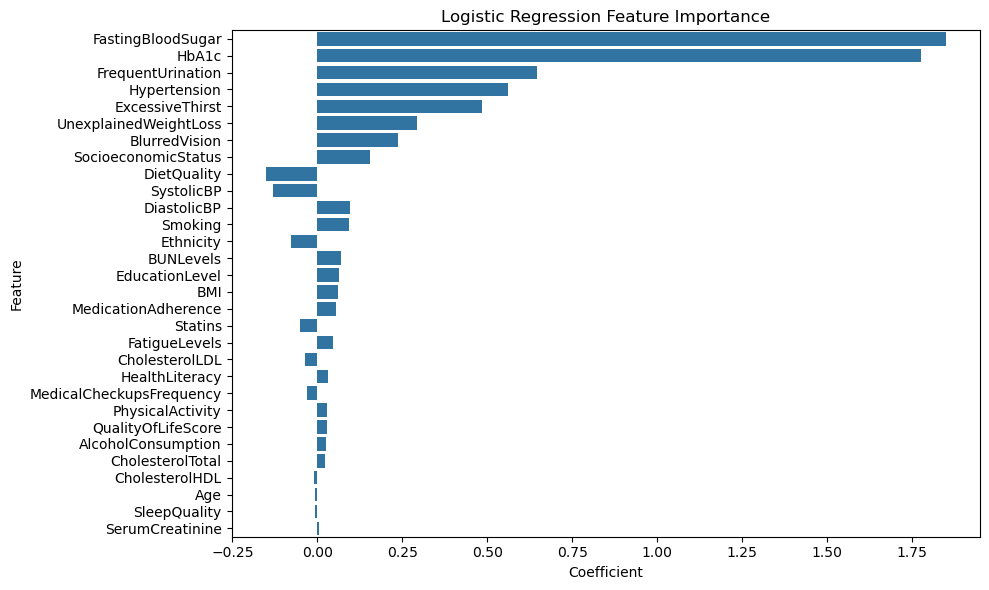

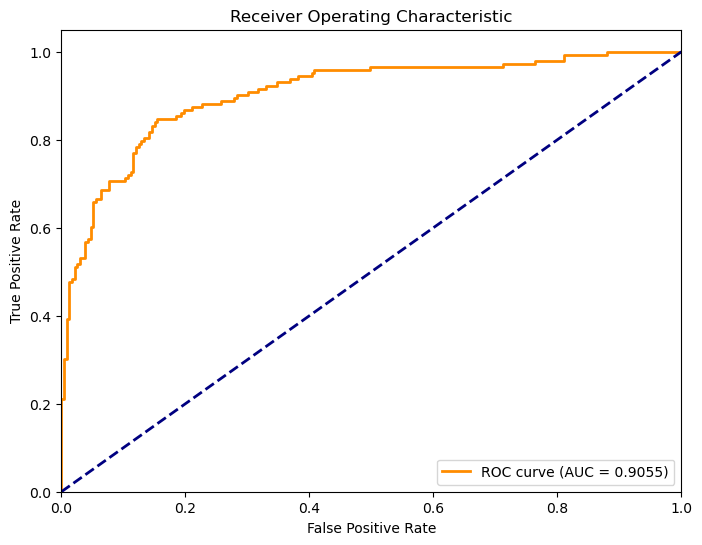

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

baseline_model = LogisticRegression(C=1.0, penalty='l2', max_iter=1000, random_state=42)
baseline_model.fit(X_train, y_train)

# 交叉验证
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(baseline_model, X_train, y_train, cv=10, scoring='accuracy')
print(f"Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# 预测
y_pred = baseline_model.predict(X_test)
y_prob = baseline_model.predict_proba(X_test)[:, 1]

# 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# 分类报告
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC曲线和AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(f"\nAUC: {roc_auc:.4f}")

# 特征重要性
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': baseline_model.coef_[0],
    'Abs_Coefficient': np.abs(baseline_model.coef_[0])
}).sort_values(by='Abs_Coefficient', ascending=False)

print("\nFeature Importance:")
print(feature_importance[['Feature', 'Coefficient']])

# 可视化特征重要性
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Logistic Regression Feature Importance')
plt.tight_layout()
plt.show()

# 可视化ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Random Forest Model

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

# 交叉验证
cv_score = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='accuracy')

print(f"Cross-validation accuracy: {cv_score.mean():.4f} ± {cv_score.std():.4f}")

# 混淆矩阵
conf_matrix = confusion_matrix(y_test, rf_model.predict(X_test))
print("\nConfusion Matrix:")
print(conf_matrix)

# 分类报告
print("\nClassification Report:")
print(classification_report(y_test, rf_model.predict(X_test)))

# ROC曲线和AUC
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
print(f"\nAUC: {roc_auc:.4f}")

Cross-validation accuracy: 0.9115 ± 0.0301

Confusion Matrix:
[[227   6]
 [ 26 117]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       233
           1       0.95      0.82      0.88       143

    accuracy                           0.91       376
   macro avg       0.92      0.90      0.91       376
weighted avg       0.92      0.91      0.91       376


AUC: 0.9534


In [31]:
def plot_roc_comparison(baseline_model, model, X_test, y_test, modelName):
    """比较基线模型和调优模型的ROC曲线"""
    plt.figure(figsize=(10, 8))
    
    # 基线模型
    y_score_baseline = baseline_model.predict_proba(X_test)[:, 1]
    fpr_baseline, tpr_baseline, _ = roc_curve(y_test, y_score_baseline)
    roc_auc_baseline = auc(fpr_baseline, tpr_baseline)
    
    # 调优模型
    y_score_tuned = model.predict_proba(X_test)[:, 1]
    fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_score_tuned)
    roc_auc_tuned = auc(fpr_tuned, tpr_tuned)
    
    # 绘制ROC曲线
    plt.plot(fpr_baseline, tpr_baseline, 'b-', label=f'Baseline Model (AUC = {roc_auc_baseline:.4f})')
    plt.plot(fpr_tuned, tpr_tuned, 'r-', label=f'{modelName} (AUC = {roc_auc_tuned:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Baseline Model vs {modelName}')
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
    
    improvement = roc_auc_tuned - roc_auc_baseline
    print(f"AUC Improvement: {improvement:.4f} ({improvement/roc_auc_baseline*100:.2f}%)")


ROC Curve Comparison (Baseline Model vs Random Forest Model):


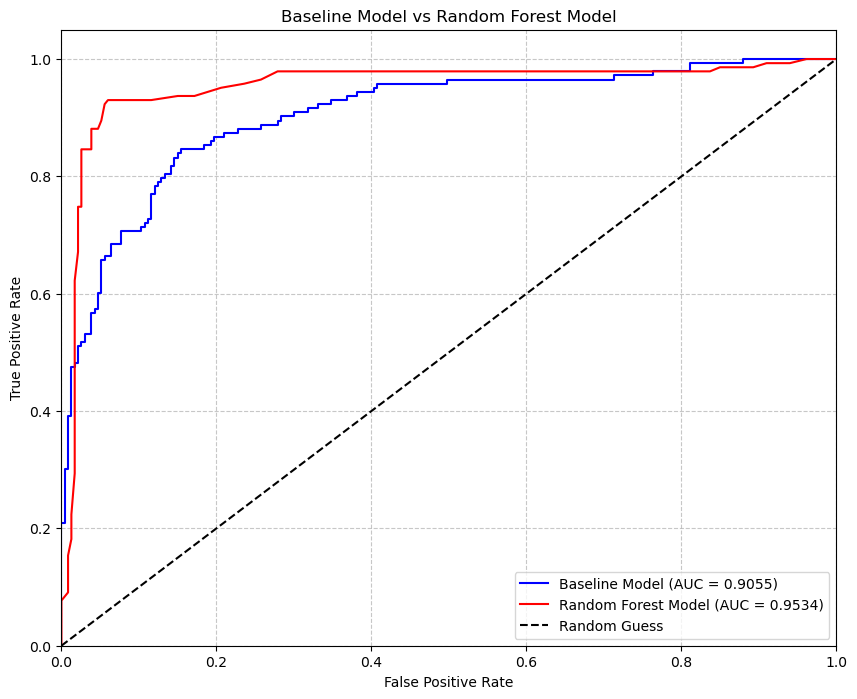

AUC Improvement: 0.0479 (5.29%)


In [32]:
print("\nROC Curve Comparison (Baseline Model vs Random Forest Model):")
plot_roc_comparison(baseline_model, rf_model, X_test, y_test, modelName="Random Forest Model")

## XGBOOST Model

XGBoost 交叉验证精确度: 0.9368 ± 0.0209

XGBoost 混淆矩阵:
[[226   7]
 [ 20 123]]

XGBoost 分类报告:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       233
           1       0.95      0.86      0.90       143

    accuracy                           0.93       376
   macro avg       0.93      0.92      0.92       376
weighted avg       0.93      0.93      0.93       376


XGBoost AUC: 0.9550


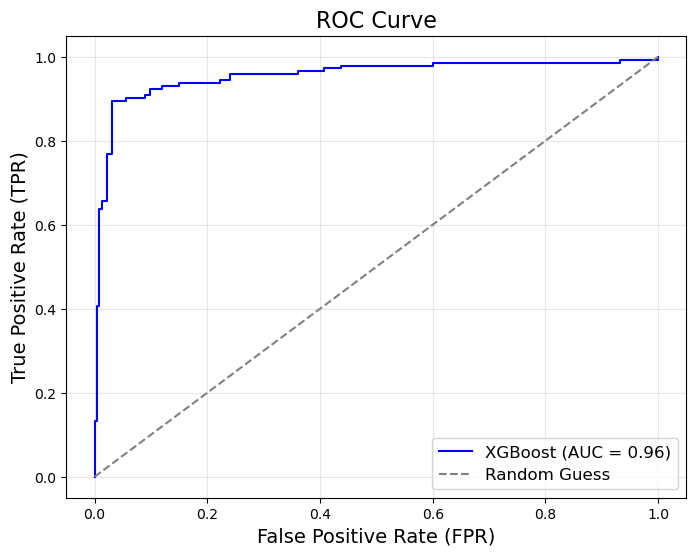

In [33]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import joblib

# 创建XGBoost模型
xgb_model = XGBClassifier(n_estimators=50, learning_rate=0.1, gamma=1.8, random_state=42, subsample=1.0)

# 交叉验证
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='accuracy')
print(f"XGBoost 交叉验证精确度: {xgb_cv_scores.mean():.4f} ± {xgb_cv_scores.std():.4f}")

# 训练模型并预测
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_y_prob = xgb_model.predict_proba(X_test)[:, 1]

joblib.dump(xgb_model, 'diabetes_xgb_model.joblib')

# 混淆矩阵
xgb_conf_matrix = confusion_matrix(y_test, xgb_y_pred)
print("\nXGBoost 混淆矩阵:")
print(xgb_conf_matrix)

# 分类报告
print("\nXGBoost 分类报告:")
print(classification_report(y_test, xgb_y_pred))

# ROC曲线和AUC
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_y_prob)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)
print(f"\nXGBoost AUC: {xgb_roc_auc:.4f}")

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(xgb_fpr, xgb_tpr, label=f"XGBoost (AUC = {xgb_roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
plt.title("ROC Curve", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()



ROC Curve Comparison (Baseline Model vs XGBoost Model):


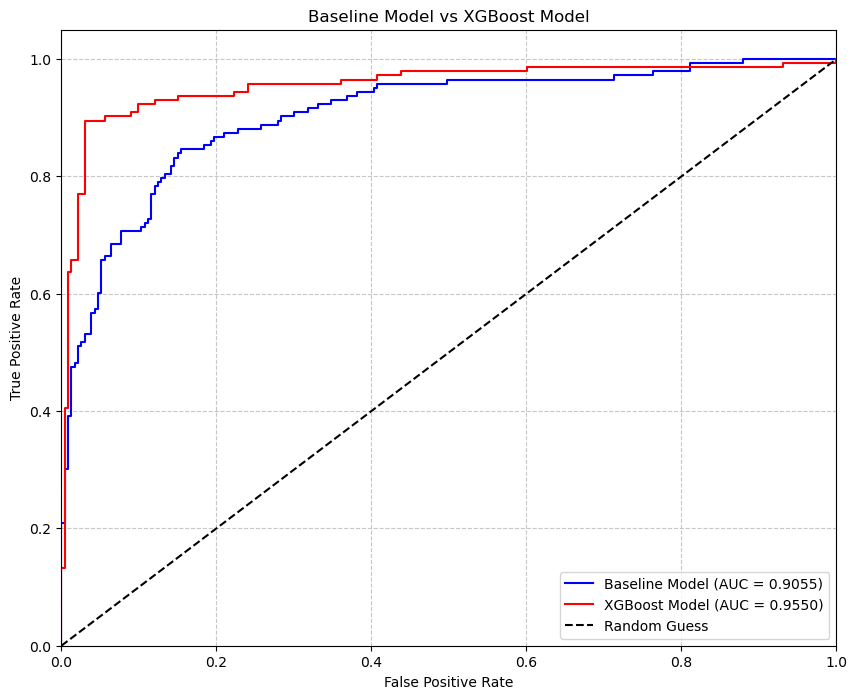

AUC Improvement: 0.0496 (5.48%)


In [34]:
print("\nROC Curve Comparison (Baseline Model vs XGBoost Model):")
plot_roc_comparison(baseline_model, xgb_model, X_test, y_test, modelName="XGBoost Model")

## MLP Model

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# 定义 MLP 模型
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim1=64, hidden_dim2=32, output_dim=1, 
                 dropout1_p=0.3, dropout2_p=0.2):
        super(MLP, self).__init__()
        # 第一个隐藏层
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.bn1 = nn.BatchNorm1d(hidden_dim1)
        self.dropout1 = nn.Dropout(dropout1_p)
        
        # 第二个隐藏层
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.bn2 = nn.BatchNorm1d(hidden_dim2)
        self.dropout2 = nn.Dropout(dropout2_p)
        
        # 输出层
        self.fc3 = nn.Linear(hidden_dim2, output_dim)
        
        # 激活函数
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        # 前向传播
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout2(x)
        
        x = self.fc3(x)
        x = self.sigmoid(x)
        
        return x


In [36]:
# 数据预处理
def prepare_data(X_train, X_test, y_train, y_test, batch_size=32):
    
    # 转换为 PyTorch 张量
    X_train_tensor = torch.FloatTensor(X_train)
    # 检查 y_train 是否为 pandas Series/DataFrame
    if hasattr(y_train, 'values'):
        y_train_tensor = torch.FloatTensor(y_train.values).reshape(-1, 1)
    else:
        y_train_tensor = torch.FloatTensor(y_train).reshape(-1, 1)
    
    X_test_tensor = torch.FloatTensor(X_test)
    # 检查 y_test 是否为 pandas Series/DataFrame
    if hasattr(y_test, 'values'):
        y_test_tensor = torch.FloatTensor(y_test.values).reshape(-1, 1)
    else:
        y_test_tensor = torch.FloatTensor(y_test).reshape(-1, 1)
    
    # 创建数据加载器
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)
    
    return train_loader, test_loader, X_test_tensor, y_test_tensor, scaler

In [37]:
# 训练模型
def train_model(model, train_loader, test_loader, epochs=100, learning_rate=0.001):
    # 定义损失函数和优化器
    criterion = nn.BCELoss()  # 二元交叉熵
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # 早停设置
    best_auc = 0
    patience = 20
    counter = 0
    best_model_state = None
    
    # 训练循环
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        
        for inputs, targets in train_loader:
            # 清零梯度
            optimizer.zero_grad()
            
            # 前向传播
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            # 反向传播和优化
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        # 评估模型
        model.eval()
        all_preds = []
        all_targets = []
        val_loss = 0.0
        
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()
                
                all_preds.extend(outputs.cpu().numpy())
                all_targets.extend(targets.cpu().numpy())
        
        # 计算 AUC
        from sklearn.metrics import roc_auc_score
        auc = roc_auc_score(all_targets, all_preds)
        
        # 打印训练信息
        print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(test_loader):.4f}, AUC: {auc:.4f}')
        
        # 早停检查
        if auc > best_auc:
            best_auc = auc
            counter = 0
            best_model_state = model.state_dict().copy()
        else:
            counter += 1
            if counter >= patience:
                print(f'Early stopping at epoch {epoch+1}')
                model.load_state_dict(best_model_state)
                break
    
    return model

In [38]:
# 模型评估
def evaluate_model(model, X_test_tensor, y_test_tensor):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_tensor)
    
    # 转换为 NumPy 数组
    y_pred_np = y_pred.cpu().numpy()
    y_test_np = y_test_tensor.cpu().numpy()
    
    # 计算评估指标
    from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix
    
    # 二分类阈值
    y_pred_class = (y_pred_np > 0.5).astype(int)
    
    # 计算 AUC
    auc = roc_auc_score(y_test_np, y_pred_np)
    
    # 计算准确率
    accuracy = accuracy_score(y_test_np, y_pred_class)
    
    # 打印评估结果
    print(f"测试集 AUC: {auc:.4f}")
    print(f"测试集准确率: {accuracy:.4f}")
    print("\n分类报告:")
    print(classification_report(y_test_np, y_pred_class))
    print("\n混淆矩阵:")
    print(confusion_matrix(y_test_np, y_pred_class))
    
    return y_pred_np

In [39]:
# 主函数
def main(X_train, X_test, y_train, y_test):
    input_dim = X_train.shape[1]
    
    best_params = {
        'hidden_dim1': 32,
        'hidden_dim2': 32,
        'dropout1_p': 0.4,
        'dropout2_p': 0.1,
        'lr': 0.01,
        'batch_size': 16
    }
    
    train_loader, test_loader, X_test_tensor, y_test_tensor, scaler = prepare_data(
        X_train, X_test, y_train, y_test, batch_size=best_params['batch_size']
    )
        
    # 创建模型
    model = MLP(
        input_dim=input_dim,
        hidden_dim1=best_params['hidden_dim1'],
        hidden_dim2=best_params['hidden_dim2'],
        dropout1_p=best_params['dropout1_p'],
        dropout2_p=best_params['dropout2_p']
    )
        
    # 训练模型
    model = train_model(model, train_loader, test_loader, learning_rate=best_params['lr'])
    
    # 评估模型
    y_pred = evaluate_model(model, X_test_tensor, y_test_tensor)

    # 绘制 ROC 曲线
    print("\n绘制 ROC 曲线...")
    y_test_np = y_test_tensor.cpu().numpy()
    y_pred_np = y_pred
    
    fpr, tpr, _ = roc_curve(y_test_np, y_pred_np)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    # 保存模型
    torch.save(model.state_dict(), 'pytorch_mlp_model.pth')
    
    return model, scaler, y_pred_np


Epoch 1/100, Loss: 0.5394, Val Loss: 0.3843, AUC: 0.9029
Epoch 2/100, Loss: 0.4302, Val Loss: 0.3510, AUC: 0.9165
Epoch 3/100, Loss: 0.4099, Val Loss: 0.3430, AUC: 0.9267
Epoch 4/100, Loss: 0.3965, Val Loss: 0.3467, AUC: 0.9225
Epoch 5/100, Loss: 0.3796, Val Loss: 0.3466, AUC: 0.9230
Epoch 6/100, Loss: 0.3815, Val Loss: 0.3279, AUC: 0.9279
Epoch 7/100, Loss: 0.3740, Val Loss: 0.3355, AUC: 0.9227
Epoch 8/100, Loss: 0.3698, Val Loss: 0.3474, AUC: 0.9206
Epoch 9/100, Loss: 0.3458, Val Loss: 0.3484, AUC: 0.9230
Epoch 10/100, Loss: 0.3756, Val Loss: 0.3464, AUC: 0.9194
Epoch 11/100, Loss: 0.3580, Val Loss: 0.3403, AUC: 0.9201
Epoch 12/100, Loss: 0.3549, Val Loss: 0.3405, AUC: 0.9206
Epoch 13/100, Loss: 0.3492, Val Loss: 0.3250, AUC: 0.9289
Epoch 14/100, Loss: 0.3361, Val Loss: 0.3303, AUC: 0.9274
Epoch 15/100, Loss: 0.3624, Val Loss: 0.3248, AUC: 0.9269
Epoch 16/100, Loss: 0.3314, Val Loss: 0.3391, AUC: 0.9208
Epoch 17/100, Loss: 0.3431, Val Loss: 0.3389, AUC: 0.9232
Epoch 18/100, Loss: 0.3

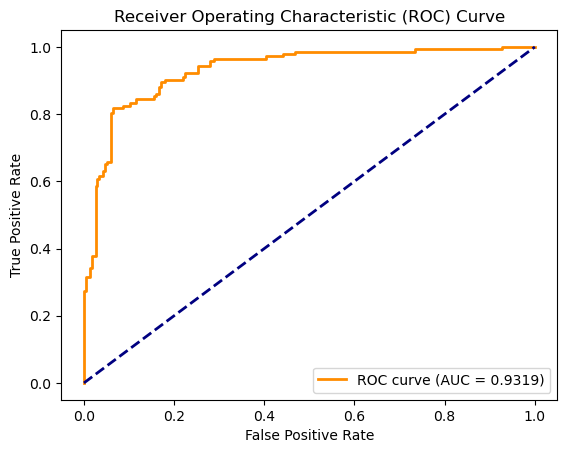

In [40]:
# 训练和评估模型
mlp_model, scaler, mlp_pred = main(X_train, X_test, y_train, y_test)


## Embending model

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_predict

In [43]:
# 定义基础模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
lgb = LGBMClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

# 定义元模型
meta_model = LogisticRegression()

# 构建 Stacking 模型
stacking_clf = StackingClassifier(
    estimators=[('rf', rf), ('xgb', xgb), ('lgb', lgb)],  # 第一层模型
    final_estimator=meta_model,                          # 第二层元模型
    cv=5,                                                # 交叉验证
    stack_method='predict_proba'                         # 使用概率作为输入
)

In [44]:
# 模型训练
stacking_clf.fit(X_train, y_train)

# 模型预测
y_pred = stacking_clf.predict(X_test)
y_pred_proba = stacking_clf.predict_proba(X_test)[:, 1]

# 模型评估
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred_proba))

c:\ProgramData\anaconda3\envs\ml_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:45:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 609, number of negative: 894
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4594
[LightGBM] [Info] Number of data points in the train set: 1503, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.405190 -> initscore=-0.383888
[LightGBM] [Info] Start training from score -0.383888


c:\ProgramData\anaconda3\envs\ml_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:45:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\ProgramData\anaconda3\envs\ml_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:45:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 487, number of negative: 715
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4594
[LightGBM] [Info] Number of data points in the train set: 1202, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.405158 -> initscore=-0.384018
[LightGBM] [Info] Start training from score -0.384018
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 487, number of negative: 715
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4594
[LightGBM] [Info] Number of data points in the train set: 1202, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.405158 -> initscore=-0.384018
[

# 比较模型ROC-AUC Score

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def compare_roc_curves(models, baseline_model, mlp_pred, X_train, y_train, X_test, y_test):
    plt.figure(figsize=(10, 8))
    
    # 转换 y_test 为 numpy 数组（确保兼容性）
    y_test_np = y_test if isinstance(y_test, (list, tuple)) else y_test.to_numpy() if hasattr(y_test, 'to_numpy') else y_test
    
    # 计算并绘制基线模型的ROC曲线
    baseline_model.fit(X_train, y_train)
    if hasattr(baseline_model, 'predict_proba'):
        baseline_probs = baseline_model.predict_proba(X_test)[:, 1]
    else:
        baseline_probs = baseline_model.predict(X_test)  
    fpr, tpr, _ = roc_curve(y_test_np, baseline_probs)
    baseline_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Baseline (AUC = {baseline_auc:.2f})", linestyle="--", color="black")
    
    # 计算并绘制其他模型的ROC曲线
    for name, model in models.items():
        if name == 'MLP':
            y_pred = mlp_pred
        else:
            model.fit(X_train, y_train)
            if hasattr(model, 'predict_proba'):
                y_pred = model.predict_proba(X_test)[:, 1]
            else:
                y_pred = model.predict(X_test) 

        fpr, tpr, _ = roc_curve(y_test_np, y_pred)
        model_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {model_auc:.2f})")
    
    # 绘制随机分类的参考线
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
    
    # 图形美化
    plt.title("ROC Curve Comparison", fontsize=16)
    plt.xlabel("False Positive Rate (FPR)", fontsize=14)
    plt.ylabel("True Positive Rate (TPR)", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

c:\ProgramData\anaconda3\envs\ml_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:46:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 609, number of negative: 894
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000654 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4594
[LightGBM] [Info] Number of data points in the train set: 1503, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.405190 -> initscore=-0.383888
[LightGBM] [Info] Start training from score -0.383888


c:\ProgramData\anaconda3\envs\ml_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:46:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\ProgramData\anaconda3\envs\ml_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:46:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 487, number of negative: 715
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000566 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4594
[LightGBM] [Info] Number of data points in the train set: 1202, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.405158 -> initscore=-0.384018
[LightGBM] [Info] Start training from score -0.384018
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 487, number of negative: 715
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4594
[LightGBM] [Info] Number of data points in the train set: 1202, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.405158 -> initscore=-0.384018
[

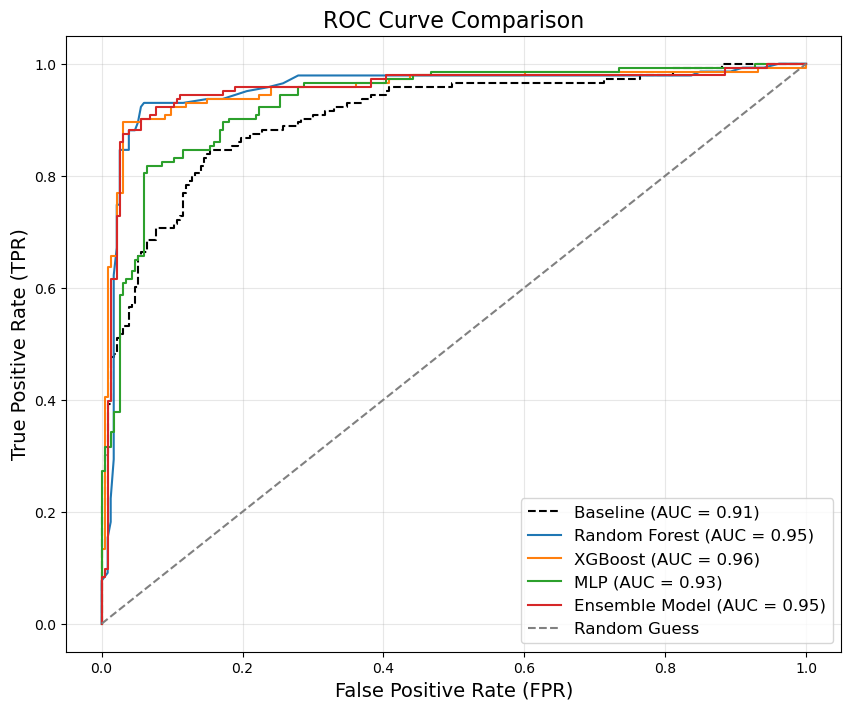

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 定义基线模型和其他模型
models = {
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'MLP': mlp_model,
    'Ensemble Model': stacking_clf
}

# 调用函数比较ROC曲线
compare_roc_curves(models, baseline_model, mlp_pred, X_train, y_train, X_test, y_test)
